In [1]:
# Module importations
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression

In [2]:
# Constants / Settings
plt.style.use('seaborn-whitegrid')

plt.rc('figure', autolayout = True)
plt.rc(
    'axes',
    labelweight = 'bold',
    labelsize = 'large',
    titleweight = 'bold',
    titlesize = 14,
    titlepad = 10
)

In [3]:
# Plot builder helper method
def plot_variance(pca, width = 8, dpi = 100):

    # Initialise figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)

    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(xlabel = 'Component', title = '% Explained Variance', ylim = (0.0, 1.0))

    # Cumulative variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], 'o-')
    axs[1].set(xlabel = 'Component', title = '% Cumulative Variance', ylim = (0.0, 1.0))

    # Build figure
    fig.set(figwidth = 8, dpi = 100)
    return axs    

In [4]:
# Make MI scores helper method
def make_mi_scores(X, y, discrete_features):

    # Develop scores using regression
    mi_scores = mutual_info_regression(X, y, discrete_features = discrete_features)

    # Convert to data series
    mi_scores = pd.Series(mi_scores, name = 'MI Scores', index = X.columns)

    # Sort and return
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores

In [5]:
# Load data
autos = pd.read_csv(r'C:\Developer\scratch-pad-python\Datasets\Automobile_data.csv')

In [6]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
autos.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [8]:
autos.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


In [9]:
# Convert horsepower to numeric type
def convert_to_numeric(data_element):
    
    try:
        numeric_data = float(data_element)

    except:
        numeric_data = 0.1

    return numeric_data
        
autos['horsepower'] = autos.apply(lambda row: convert_to_numeric(row['horsepower']), axis = 1)
autos['price'] = autos.apply(lambda row: convert_to_numeric(row['price']), axis = 1)

autos['price'].describe()

count      205.000000
mean     12949.431220
std       8079.040141
min          0.100000
25%       7689.000000
50%      10198.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [10]:
# Select and standardise a small number of features with high Mutual Information
features = ['highway-mpg', 'engine-size', 'horsepower', 'curb-weight']

# Create training and target datasets
X = autos.copy()
y = X.pop('price')
X = X.loc[:, features]

# Standardise features
X_scaled = (X - X.mean(axis = 0)) / X.std(axis = 0)

print(X_scaled.describe().T)
print(X_scaled.info())

             count          mean  std       min       25%       50%       75%  \
highway-mpg  205.0  1.364762e-16  1.0 -2.142067 -0.835151 -0.109087  0.471765   
engine-size  205.0  3.466062e-17  1.0 -1.582686 -0.718189 -0.165871  0.338419   
horsepower   205.0 -2.242109e-16  1.0 -2.526084 -0.814107 -0.201812  0.312515   
curb-weight  205.0  9.531671e-17  1.0 -2.050329 -0.788518 -0.271886  0.728728   

                  max  
highway-mpg  3.376022  
engine-size  4.780975  
horsepower   4.525105  
curb-weight  2.900886  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   highway-mpg  205 non-null    float64
 1   engine-size  205 non-null    float64
 2   horsepower   205 non-null    float64
 3   curb-weight  205 non-null    float64
dtypes: float64(4)
memory usage: 6.5 KB
None


In [11]:
# Create the principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f'PC{i + 1}' for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns = component_names)

X_pca.head()

,PC1,PC2,PC3,PC4
0,0.389897,-0.371436,0.081879,0.204659
1,0.389897,-0.371436,0.081879,0.204659
2,1.518419,-0.077995,0.573226,-0.090587
3,-0.393833,-0.396403,0.237873,0.071595
4,1.137787,-0.786811,-0.244513,0.194703


The PCA instance contains loadings in the components_ attribute.

This can be transposed into a dataframe.

In [12]:
# Transpose loadings
loadings = pd.DataFrame(
    pca.components_.T,          # Transpose the matrix of loadings
    columns = component_names,  # so the columns are the principal components
    index = X.columns           # and the rows are the original features
)

loadings

,PC1,PC2,PC3,PC4
highway-mpg,-0.488458,0.771916,0.134621,-0.383968
engine-size,0.503398,0.627581,-0.104475,0.584651
horsepower,0.494068,0.020424,0.815157,-0.301661
curb-weight,0.513709,0.099345,-0.553607,-0.647883


PC1 generates a 'luxury/economy' axis in the dataset

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024193ED7898>,
      dtype=object)

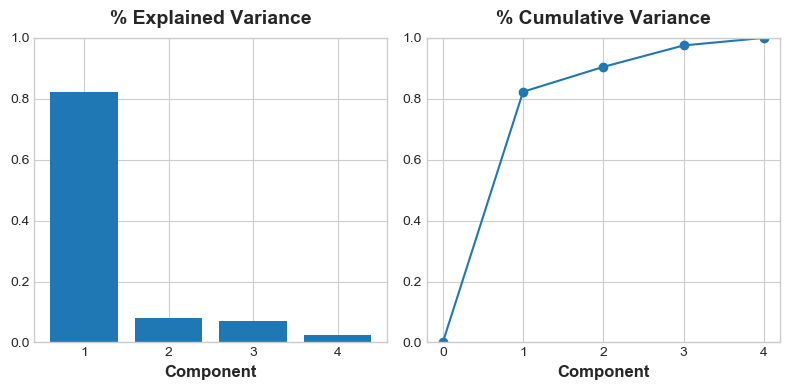

In [13]:
# Look at explained variance
plot_variance(pca)

In [14]:
# Examining Mutual Information scores of the Principle Components
mi_scores = make_mi_scores(X_pca, y, discrete_features = False)

mi_scores

PC1    0.951851
PC2    0.360647
PC4    0.210426
PC3    0.199788
Name: MI Scores, dtype: float64

The MI Scores show PC1 is the most informative, but there is also information contained in the other principle components.

Examining these components further could be useful.

PC3 shows a contrast between horsepower and curb_weight, possibly indicating another vehicle split.

In [15]:
# Show dataframe sorted by PC3

# Create an id filter
idx = X_pca['PC3'].sort_values(ascending = False).index

# Filter dataframe
cols = ['make', 'body-style', 'horsepower', 'curb-weight']
autos.loc[idx, cols]

,make,body-style,horsepower,curb-weight
129,porsche,hatchback,288.0,3366
126,porsche,hardtop,207.0,2756
127,porsche,hardtop,207.0,2756
128,porsche,convertible,207.0,2800
105,nissan,hatchback,200.0,3139
...,...,...,...,...
110,peugot,wagon,95.0,3430
155,toyota,wagon,62.0,3110
114,peugot,wagon,95.0,3485
131,renault,hatchback,0.1,2460


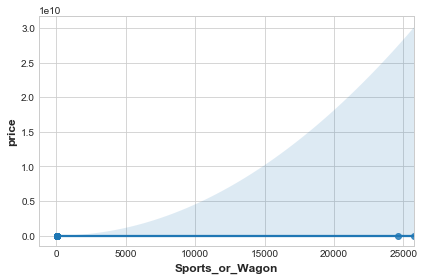

In [20]:
# Create a new ratio feature to visualise impact
autos['Sports_or_Wagon'] = X['curb-weight'] / X['horsepower']

# Plot feature
sns.regplot(x = 'Sports_or_Wagon', y = 'price', data = autos, order = 2)

In [19]:
autos['Sports_or_Wagon'].describe()

count      205.000000
mean       271.768501
std       2480.600709
min         11.687500
25%         22.477612
50%         26.454545
75%         29.250000
max      25790.000000
Name: Sports_or_Wagon, dtype: float64